In [1]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
iris=load_iris()
dir(iris)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [4]:
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
df1=df.drop(['sepal length (cm)','sepal width (cm)'],axis='columns')
df1

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


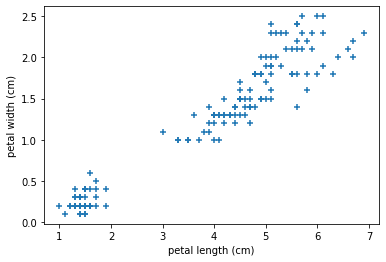

In [11]:
plt.scatter(df1['petal length (cm)'],df1['petal width (cm)'],marker='+')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.show()

In [29]:
km=KMeans(n_clusters=3)
km.fit(df1[['petal length (cm)','petal width (cm)']])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [30]:
x =km.predict(df1[['petal length (cm)','petal width (cm)']])
x

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], dtype=int32)

In [31]:
centroids=km.cluster_centers_
centroids


array([[4.26923077, 1.34230769],
       [1.462     , 0.246     ],
       [5.59583333, 2.0375    ]])

In [32]:
df1['cluster']=x
df1

,petal length (cm),petal width (cm),cluster
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,2
146,5.0,1.9,2
147,5.2,2.0,2
148,5.4,2.3,2


In [33]:
df2=df1[df1['cluster']==0]
df3=df1[df1['cluster']==1]
df4=df1[df1['cluster']==2]

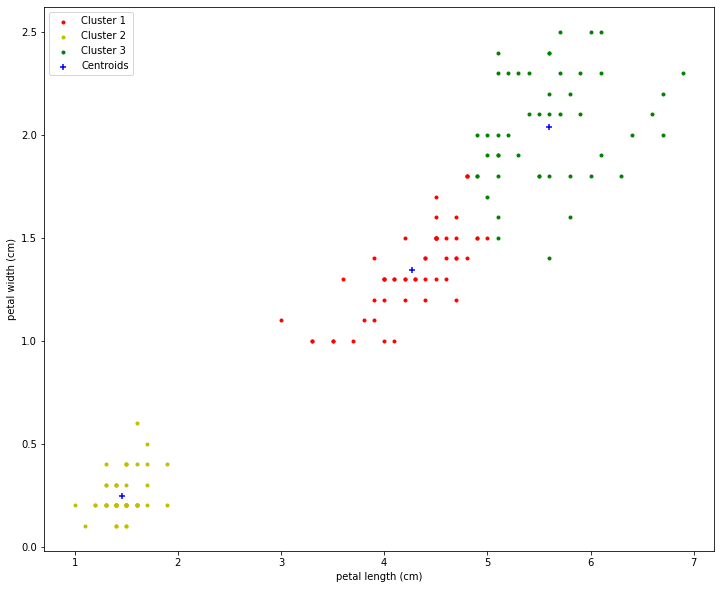

In [51]:
plt.figure(figsize=(12,10))
plt.scatter(df2['petal length (cm)'],df2['petal width (cm)'],marker='.',color='r',label='Cluster 1')
plt.scatter(df3['petal length (cm)'],df3['petal width (cm)'],marker='.',color='y',label='Cluster 2')
plt.scatter(df4['petal length (cm)'],df4['petal width (cm)'],marker='.',color='g',label='Cluster 3')
plt.scatter(centroids[:,0],centroids[:,1],marker='+',color='b',label='Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [43]:
df5=df1

In [44]:
scalar=MinMaxScaler()
scalar.fit(df5[['petal length (cm)']])
df5['petal length (cm)']=scalar.fit_transform(df5[['petal length (cm)']])

scalar.fit(df5[['petal width (cm)']])
df5['petal width (cm)']=scalar.fit_transform(df5[['petal width (cm)']])

In [45]:
df5

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,2
146,0.677966,0.750000,2
147,0.711864,0.791667,2
148,0.745763,0.916667,2


In [46]:
km1=KMeans(n_clusters=3)
km.fit(df5[['petal length (cm)','petal width (cm)']])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [47]:
x1 =km.predict(df5[['petal length (cm)','petal width (cm)']])
x1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [48]:
centroids1=km.cluster_centers_
centroids1


array([[0.7740113 , 0.81510417],
       [0.07830508, 0.06083333],
       [0.55867014, 0.51041667]])

In [49]:
df5['cluster']=x1
df5

,petal length (cm),petal width (cm),cluster
0,0.067797,0.041667,1
1,0.067797,0.041667,1
2,0.050847,0.041667,1
3,0.084746,0.041667,1
4,0.067797,0.041667,1
...,...,...,...
145,0.711864,0.916667,0
146,0.677966,0.750000,0
147,0.711864,0.791667,0
148,0.745763,0.916667,0


In [50]:
df6=df5[df5['cluster']==0]
df7=df5[df5['cluster']==1]
df8=df5[df5['cluster']==2]

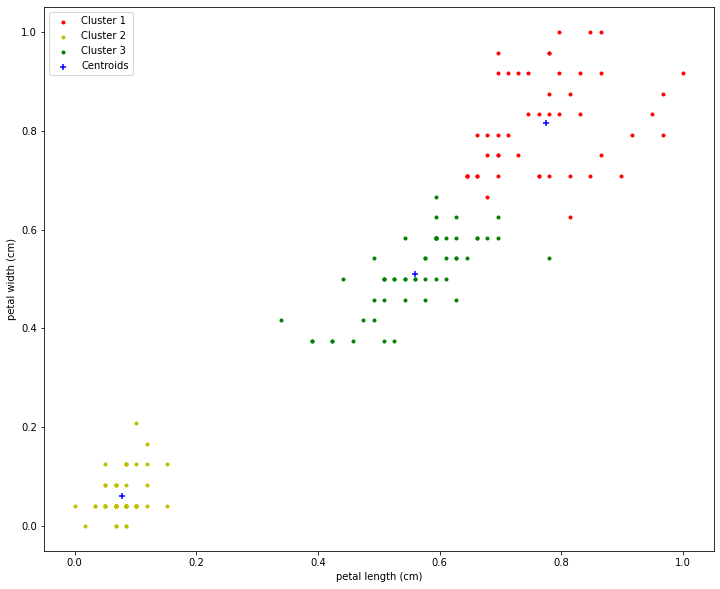

In [52]:
plt.figure(figsize=(12,10))
plt.scatter(df6['petal length (cm)'],df6['petal width (cm)'],marker='.',color='r',label='Cluster 1')
plt.scatter(df7['petal length (cm)'],df7['petal width (cm)'],marker='.',color='y',label='Cluster 2')
plt.scatter(df8['petal length (cm)'],df8['petal width (cm)'],marker='.',color='g',label='Cluster 3')
plt.scatter(centroids1[:,0],centroids1[:,1],marker='+',color='b',label='Centroids')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.legend()
plt.show()

In [54]:
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df5[['petal length (cm)','petal width (cm)']])
    sse.append(km.inertia_)

In [55]:
sse

[28.368353219727194,
 5.176463590044367,
 1.7018746881920965,
 1.1588792731667126,
 0.8535683225340073,
 0.6795297632254396,
 0.5673451458363142,
 0.4880262556573533,
 0.4160240922588873]

Text(0, 0.5, 'Sum of squared error')

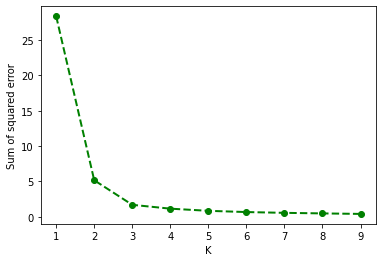

In [68]:
plt.plot(k_rng,sse,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=6)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
